# ustrade demo

In [1]:
import ustrade as ut
from ustrade import CensusClient
import matplotlib.pyplot as plt

### Retrieving data

In [ ]:
ut.get_desc_from_code("08") #search the description associated with a code

'Fruit and nuts, edible; peel of citrus fruit or melons'

In [8]:
ut.get_children_codes("08")

{'0801': 'Nuts, edible; coconuts, Brazil nuts and cashew nuts, fresh or dried, whether or not shelled or peeled',
 '0802': 'Nuts (excluding coconuts, Brazils and cashew nuts); fresh or dried, whether or not shelled or peeled',
 '0803': 'Bananas, including plantains; fresh or dried',
 '0804': 'Dates, figs, pineapples, avocados, guavas, mangoes and mangosteens; fresh or dried',
 '0805': 'Citrus fruit; fresh or dried',
 '0806': 'Grapes; fresh or dried',
 '0807': 'Melons (including watermelons) and papaws (papayas); fresh',
 '0808': 'Apples, pears and quinces; fresh',
 '0809': 'Apricots, cherries, peaches (including nectarines), plums and sloes, fresh',
 '0810': 'Fruit, fresh; n.e.c. in chapter 08',
 '0811': 'Fruit and nuts; uncooked or cooked by steaming or boiling in water, frozen, whether or not containing added sugar or other sweetening matter',
 '0812': 'Fruit and nuts provisionally preserved, but unsuitable in that state for immediate consumption',
 '0813': 'Fruit, dried, other than 

In [ ]:
ut.get_product("08") #Returns the HSCode instance associated with the code 

HSCode(section='II', hscode='08', description='Fruit and nuts, edible; peel of citrus fruit or melons', parent='TOTAL', level=2, children=['0801', '0802', '0803', '0804', '0805', '0806', '0807', '0808', '0809', '0810', '0811', '0812', '0813', '0814'])

In [9]:
mex_fruits_imports = ut.get_imports_on_period("Mexico", "08", "2010-01", "2025-01")

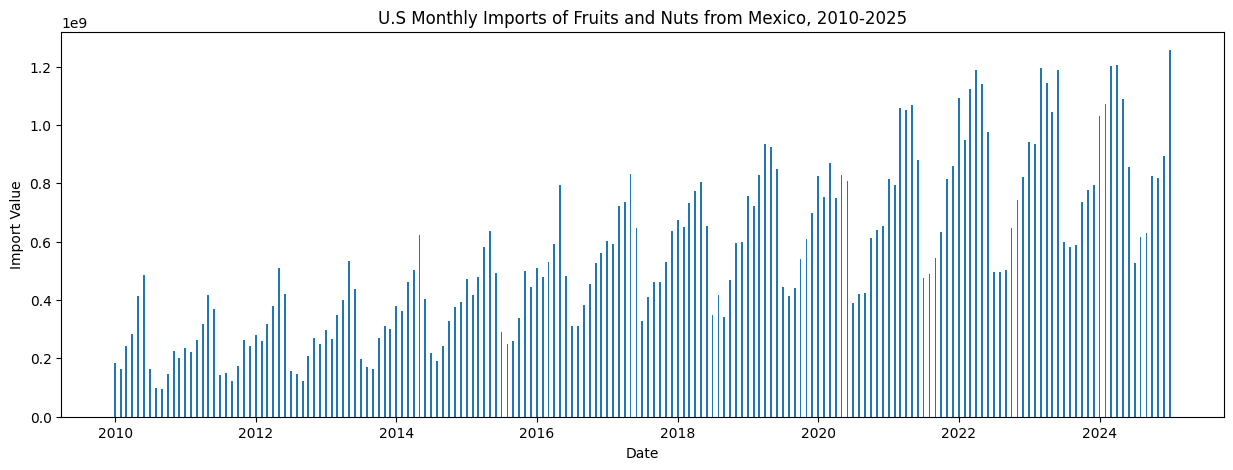

In [12]:
%matplotlib inline

plt.figure(figsize=(15,5))
plt.bar(mex_fruits_imports["date"], mex_fruits_imports["import_value"], width=10)
plt.title("U.S Monthly Imports of Fruits and Nuts from Mexico, 2010-2025")
plt.xlabel("Date")
plt.ylabel("Import Value")
plt.show()

In [24]:
mex = ut.get_country_by_name("Mexico") #Create a country object that allows to check the iso2, official name or Census code

In [25]:
mex

Country(name='Mexico', code='2010', iso2='MX')

In [ ]:
fuel_exp_mexico = ut.get_exports_on_period(mex,"27", "2010-01", "2025-01")

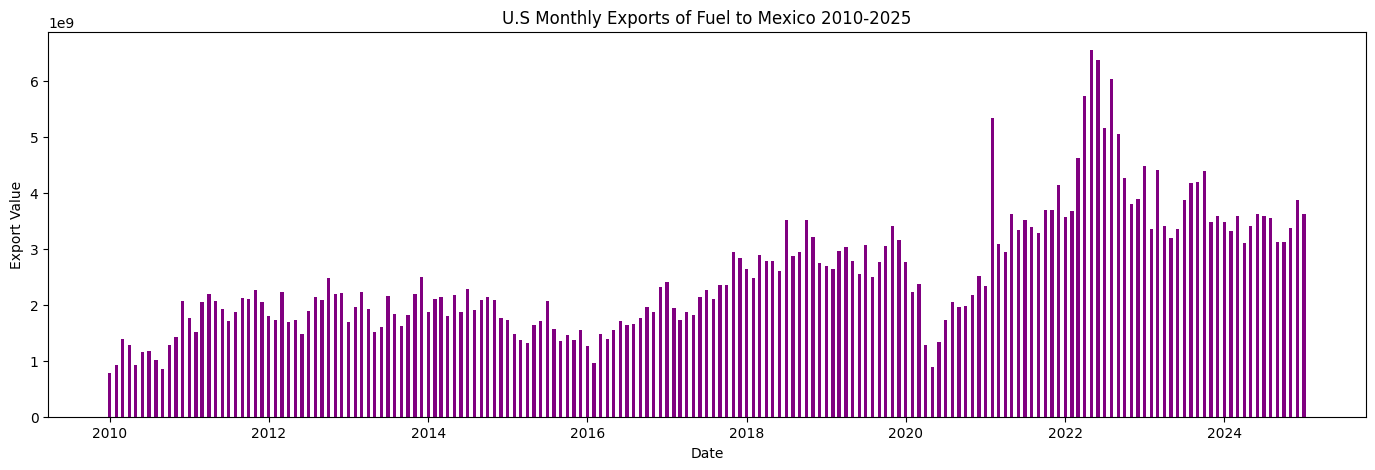

In [40]:
plt.figure(figsize=(17,5))
plt.bar(fuel_exp_mexico["date"], fuel_exp_mexico["export_value"],width=15, color = 'purple')
plt.title("U.S Monthly Exports of Fuel to Mexico 2010-2025")
plt.xlabel("Date")
plt.ylabel("Export Value")
plt.show()

## Retrieve data using custom client 

In [ ]:
c = CensusClient(timeout=120) #For customized query timeout ; default is 60 seconds 

In [19]:
c.get_desc_from_code("19")

"Preparations of cereals, flour, starch or milk; pastrycooks' products"

In [ ]:
c.get_desc_from_code("1902")

'Pasta; whether or not cooked or stuffed with meat or other substance, or otherwise prepared, egg spaghetti, macaroni, noodles, lasagne, gnocchi, ravioli, cannelloni; couscous, whether or not prepared'

In [15]:
pasta_from_italy = c.get_imports_on_period("Italy", "1902", start='2010-01', end='2025-10')

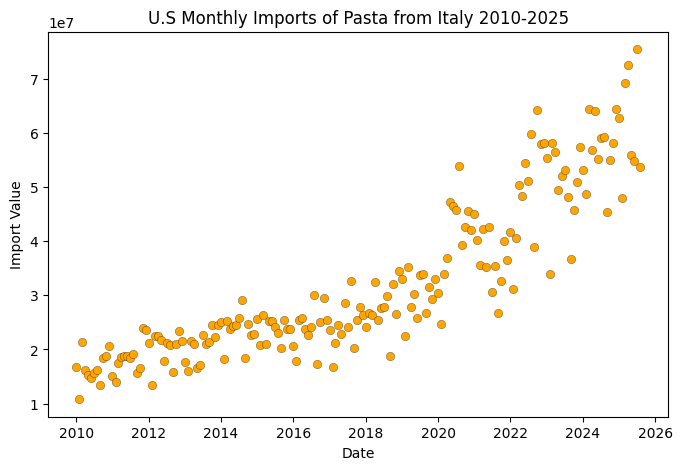

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(pasta_from_italy["date"], pasta_from_italy["import_value"],
            color = "orange",
            edgecolors="black",
            lw = 0.2)
plt.title("U.S Monthly Imports of Pasta from Italy 2010-2025")
plt.xlabel("Date")
plt.ylabel("Import Value")
plt.show() 